In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#from matplotlib import style
#style.use('fivethirtyeight')
import seaborn as sns
#sns.set(style = 'white', color_code=True)
# import warnings
# warnings.filterwarnings('ignore')
# sns.set_style('whitegrid')

from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Performing grid search
# from sklearn.model_selection import GridSearchCV
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

In [59]:
df = pd.read_csv('train_modified27jan.csv')
dtest = pd.read_csv('test_modified27jan.csv')

In [60]:
df.head()

,Credit_History,Loan_ID,Loan_Status,Total_Income_log,LoanAmount_log,Loan_Amount_Term_log,EMI,Ratio,Married_0,Married_1,Dependents_0,Dependents_1,Dependents_2,Dependents_3,Education_0,Education_1,Property_Area_0,Property_Area_1,Property_Area_2
0,1.0,LP001002,Y,8.674026,4.841041,5.886104,0.822452,0.558108,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,LP001003,N,8.714568,4.852030,5.886104,0.824319,0.556772,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1.0,LP001005,Y,8.006368,4.189655,5.886104,0.711787,0.523290,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,LP001006,Y,8.505323,4.787492,5.886104,0.813355,0.562882,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1.0,LP001008,Y,8.699515,4.948760,5.886104,0.840753,0.568855,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [61]:
X_test = dtest.drop('Loan_ID',axis=1)
X_test.head()

,Credit_History,Total_Income_log,LoanAmount_log,Loan_Amount_Term_log,EMI,Ratio,Married_0,Married_1,Dependents_0,Dependents_1,Dependents_2,Dependents_3,Education_0,Education_1,Property_Area_0,Property_Area_1,Property_Area_2
0,1.0,8.651724,4.841041,5.886104,0.822452,0.559546,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,8.428581,4.836282,5.886104,0.821644,0.573796,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,8.824678,5.337538,5.886104,0.906803,0.604842,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,8.494129,4.605170,5.886104,0.782380,0.542159,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1.0,8.094378,4.356709,5.886104,0.740169,0.538239,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [62]:
target = 'Loan_Status'
IDcol = 'Loan_ID'
df.head()

,Credit_History,Loan_ID,Loan_Status,Total_Income_log,LoanAmount_log,Loan_Amount_Term_log,EMI,Ratio,Married_0,Married_1,Dependents_0,Dependents_1,Dependents_2,Dependents_3,Education_0,Education_1,Property_Area_0,Property_Area_1,Property_Area_2
0,1.0,LP001002,Y,8.674026,4.841041,5.886104,0.822452,0.558108,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,LP001003,N,8.714568,4.852030,5.886104,0.824319,0.556772,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1.0,LP001005,Y,8.006368,4.189655,5.886104,0.711787,0.523290,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,LP001006,Y,8.505323,4.787492,5.886104,0.813355,0.562882,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1.0,LP001008,Y,8.699515,4.948760,5.886104,0.840753,0.568855,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import cross_validation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
models = []
models.append(('LR',LogisticRegression()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC()))
models.append(('GBM',GradientBoostingClassifier(learning_rate =0.1,random_state=10,subsample=0.8,n_estimators=20,max_features=3,
                                 max_depth=5,min_samples_leaf=13,min_samples_split=50)))
predictors = [x for x in df.columns if x not in [target, IDcol]]
#Evaluate each model
results = []
names = []
for name,model in models:
    #kfold = model_selection.KFold(n_splits=10,random_state=7)
    cv_results = cross_validation.cross_val_score(model,df[predictors],df['Loan_Status'],cv=10,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.809446 (0.033496)
LDA: 0.807806 (0.034153)
KNN: 0.760578 (0.042557)
CART: 0.708535 (0.033125)
NB: 0.796383 (0.035339)


C:\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables ar

SVM: 0.809446 (0.033496)
GBM: 0.807963 (0.035521)


In [63]:
from sklearn.linear_model import LogisticRegression
predictors = [x for x in df.columns if x not in [target, IDcol]]
#logReg = LogisticRegression(fit_intercept = False,C = 1e9)
#logReg = LogisticRegression(fit_intercept = False,C=0.01, tol=0.00001)
logReg = GradientBoostingClassifier(learning_rate =0.1,random_state=10,subsample=0.8,n_estimators=20,max_features=3,
                                 max_depth=5,min_samples_leaf=13,min_samples_split=50)
logReg.fit(df[predictors],df['Loan_Status'])
#print(logReg.coef_)
print(logReg.get_params())
dtrain_predictions = logReg.predict(X_test)
logReg.score(df[predictors],df['Loan_Status'])

{'verbose': 0, 'max_features': 3, 'n_estimators': 20, 'presort': 'auto', 'min_samples_leaf': 13, 'learning_rate': 0.1, 'max_leaf_nodes': None, 'init': None, 'min_samples_split': 50, 'max_depth': 5, 'loss': 'deviance', 'warm_start': False, 'random_state': 10, 'min_weight_fraction_leaf': 0.0, 'subsample': 0.8}


0.81596091205211729

In [64]:
submission = pd.DataFrame({
        'Loan_ID':dtest['Loan_ID'],
        'Loan_Status':dtrain_predictions
    })
submission.to_csv('Loan_Prediction.csv',index=False)

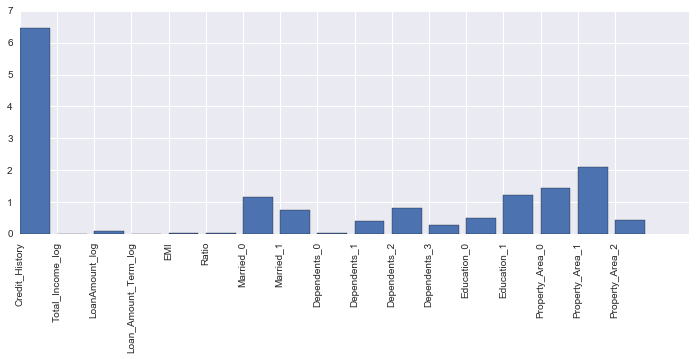

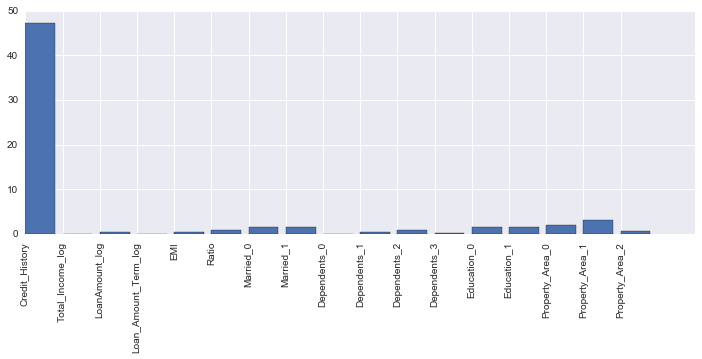

In [9]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,f_classif
sel1 = SelectKBest(chi2, k=10)
sel1.fit_transform(df[predictors],df['Loan_Status'])

# Perform feature selection
#selector = SelectKBest(f_classif, k=5)
#selector.fit(titanic[predictors], titanic["Survived"])

# Get the raw p-values for each feature, and transform from p-values into scores
scores1 = -np.log10(sel1.pvalues_)

# Plot the scores.  See how "Pclass", "Sex", "Title", and "Fare" are the best?
plt.bar(range(len(predictors)), scores1)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()

sel2 = SelectKBest(f_classif, k=10)
sel2.fit_transform(df[predictors],df['Loan_Status'])

# Perform feature selection
#selector = SelectKBest(f_classif, k=5)
#selector.fit(titanic[predictors], titanic["Survived"])

# Get the raw p-values for each feature, and transform from p-values into scores
scores2 = -np.log10(sel2.pvalues_)

# Plot the scores.  See how "Pclass", "Sex", "Title", and "Fare" are the best?
plt.bar(range(len(predictors)), scores2)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()

In [10]:
################## LIBRARIES ###################
import pandas as pd
import numpy as np
import xgboost as xgb

################ dataset load ###################
# train_data_df = pd.read_csv('train_modified27jan.csv')
# test_data_df = pd.read_csv('test_modified27jan.csv')

# output = pd.Series(df.Loan_Status, dtype="float")
# train_data_df = df.drop('Loan_Status',1)
# train_data_df = df.drop('Loan_ID',1)

# id = dtest.Loan_ID
# test_data_df = dtest.drop('Loan_ID',1)

# test_data_df = test_data_df.astype('float')
# train_data_df.head()
# train_data_df = train_data_df.astype('float')


# xgb_tr = xgb.DMatrix(train_data_df, label=output, missing=np.NaN)
# xgb_ts = xgb.DMatrix(test_data_df, missing=np.NaN)

############## Prediction model #################
# param = {}
# param['objective'] = 'binary:logitraw'
# param['eta'] = 0.1
# param['max_delta_step'] = 1000
# param['max_depth'] = 5

# param['lambda']=0.001
# param['subsample'] = 0.85

# param['gamma'] = 1
# param['min_child_weight'] = 17
# num_round = 2000

# gbm = xgb.train(param,xgb_tr,num_round)
# test_pred = gbm.predict(xgb_ts)


# f = open("submission.csv","w")
# f.write("Loan_ID,Loan_Status\n")
# for i in range(len(test_pred)):
#     if test_pred[i]<=0:
#         a = "N"
#     else:
#         a = "Y"
# f.write(str(id[i])+","+a)
# f.write("\n")

## Cross Validation

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score

knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn,df[predictors],df['Loan_Status'],cv=10,scoring='accuracy')
print(scores)

[ 0.73015873  0.79365079  0.70491803  0.70491803  0.81967213  0.80327869
  0.81967213  0.73770492  0.75409836  0.73770492]


In [12]:
print(scores.mean())

0.760577673692


In [13]:
k_range = range(1,10)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,df[predictors],df['Loan_Status'],cv=10,scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)    
    

[0.69372885766328396, 0.64342961228207129, 0.75586781160551664, 0.71001821493624773, 0.7605776736924279, 0.74100962789487379, 0.71017434296122828, 0.71514441842310694, 0.71837106427270359]


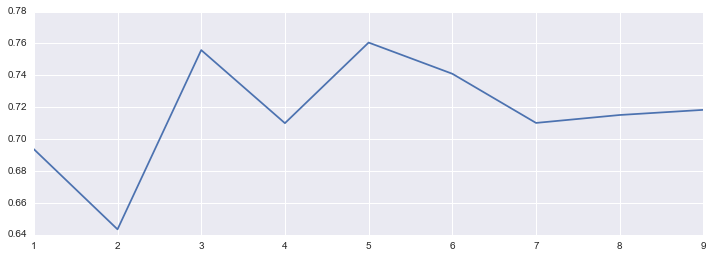

In [14]:
plt.plot(k_range,k_scores)

## GridSearchCV

In [15]:
from sklearn.grid_search import GridSearchCV
k_range = list(range(1,11))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [16]:
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}


In [17]:
grid = GridSearchCV(knn,param_grid,cv=10,scoring='accuracy')

In [18]:
grid.fit(df[predictors],df['Loan_Status'])

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [19]:
grid.grid_scores_

[mean: 0.69381, std: 0.03442, params: {'n_neighbors': 1},
 mean: 0.64332, std: 0.04467, params: {'n_neighbors': 2},
 mean: 0.75570, std: 0.02541, params: {'n_neighbors': 3},
 mean: 0.71010, std: 0.04032, params: {'n_neighbors': 4},
 mean: 0.76059, std: 0.04256, params: {'n_neighbors': 5},
 mean: 0.74104, std: 0.04183, params: {'n_neighbors': 6},
 mean: 0.71010, std: 0.02805, params: {'n_neighbors': 7},
 mean: 0.71498, std: 0.03029, params: {'n_neighbors': 8},
 mean: 0.71824, std: 0.03256, params: {'n_neighbors': 9},
 mean: 0.71498, std: 0.03245, params: {'n_neighbors': 10}]

In [20]:
print(grid.grid_scores_[0].parameters)
print(grid.grid_scores_[0].cv_validation_scores)
print(grid.grid_scores_[0].mean_validation_score)

{'n_neighbors': 1}
[ 0.66666667  0.74603175  0.63934426  0.67213115  0.6557377   0.73770492
  0.72131148  0.72131148  0.68852459  0.68852459]
0.693811074919


In [21]:
grid_mean_score = [result.mean_validation_score for result in grid.grid_scores_]
print(grid_mean_score)

[0.69381107491856675, 0.64332247557003253, 0.75570032573289903, 0.71009771986970682, 0.76058631921824105, 0.74104234527687296, 0.71009771986970682, 0.71498371335504884, 0.71824104234527686, 0.71498371335504884]


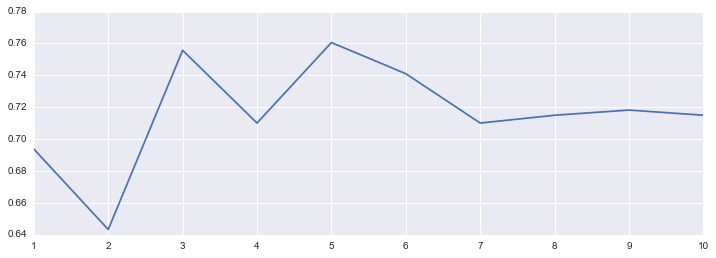

In [22]:
plt.plot(k_range,grid_mean_score)

In [23]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.760586319218
{'n_neighbors': 5}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')


In [24]:
weight_options = ['uniform','distance']
param_grid1 = dict(n_neighbors=k_range,weights=weight_options)

grid1 = GridSearchCV(knn,param_grid1,cv=10,scoring='accuracy')
grid1.fit(df[predictors],df['Loan_Status'])
# print(grid1.grid_scores_)
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.760586319218
{'n_neighbors': 5}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')


In [25]:
knn = KNeighborsClassifier(n_neighbors=5,weights='uniform')
knn.fit(df[predictors],df['Loan_Status'])
dtrain_predictions = knn.predict(X_test)

## RandomizedSearch CV

In [26]:
from sklearn.grid_search import RandomizedSearchCV

grid_param = dict(n_neignbors=k_range,weights=weight_options)
rand = RandomizedSearchCV(knn,param_grid,n_iter=10,random_state=5,scoring='accuracy')
rand.fit(df[predictors],df['Loan_Status'])
rand.grid_scores_

[mean: 0.70847, std: 0.00431, params: {'n_neighbors': 1},
 mean: 0.65472, std: 0.00963, params: {'n_neighbors': 2},
 mean: 0.73616, std: 0.02209, params: {'n_neighbors': 3},
 mean: 0.70684, std: 0.02465, params: {'n_neighbors': 4},
 mean: 0.72150, std: 0.01453, params: {'n_neighbors': 5},
 mean: 0.70521, std: 0.04145, params: {'n_neighbors': 6},
 mean: 0.70358, std: 0.02008, params: {'n_neighbors': 7},
 mean: 0.71173, std: 0.02833, params: {'n_neighbors': 8},
 mean: 0.71498, std: 0.00877, params: {'n_neighbors': 9},
 mean: 0.72476, std: 0.00876, params: {'n_neighbors': 10}]

In [27]:
rand.best_score_

0.73615635179153094

In [28]:
from sklearn.cross_validation import train_test_split
from sklearn import metrics
X_train,X_test,Y_train,Y_test = train_test_split(df[predictors],df['Loan_Status'],random_state=0)
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression()
logReg.fit(X_train,Y_train)
Y_pred_class = logReg.predict(X_test)
print(metrics.accuracy_score(Y_pred_class,Y_test))
# dtrain_predictions

0.831168831169


In [29]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
Y_pred_class = np.array([number[0] for number in lb.fit_transform(Y_pred_class)])
Y_test = np.array([number[0] for number in lb.fit_transform(Y_test.values)])

In [30]:
print('True:',Y_test[0:18])
print('Pred:',Y_pred_class[0:18])

True: [1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 0 1]
Pred: [1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1]


In [31]:
print(metrics.confusion_matrix(Y_test,Y_pred_class))

[[ 19  24]
 [  2 109]]


In [32]:
confusion = metrics.confusion_matrix(Y_test,Y_pred_class)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [33]:
confusion

array([[ 19,  24],
       [  2, 109]])

In [34]:
#Classification Accuracy
print(metrics.accuracy_score(Y_test, Y_pred_class))

0.831168831169


In [35]:
#Classification Error or Mis-Classfication Rate
print(1-metrics.accuracy_score(Y_test,Y_pred_class))

0.168831168831


In [36]:
#Sensitivity or Recall Score
print(metrics.recall_score(Y_test,Y_pred_class))

0.981981981982


In [37]:
print(TN / float(TN + FP))

0.441860465116


In [38]:
#Precision Score
print(metrics.precision_score(Y_test, Y_pred_class))

0.81954887218


In [39]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
output = logReg.predict(X_test)
output = np.array([number[0] for number in lb.fit_transform(output)])

In [40]:
logReg.predict(X_test)[0:10]

array(['Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y'], dtype=object)

In [41]:
logReg.predict_proba(X_test)[0:10, :]

array([[ 0.14741726,  0.85258274],
       [ 0.18064892,  0.81935108],
       [ 0.2857006 ,  0.7142994 ],
       [ 0.19116099,  0.80883901],
       [ 0.10538011,  0.89461989],
       [ 0.9386379 ,  0.0613621 ],
       [ 0.2065344 ,  0.7934656 ],
       [ 0.2702124 ,  0.7297876 ],
       [ 0.91904985,  0.08095015],
       [ 0.14212121,  0.85787879]])

In [42]:
# print the first 10 predicted probabilities for class 1
# print the first 10 predicted probabilities for class 1
logReg.predict_proba(X_test)[0:10, 1]

array([ 0.85258274,  0.81935108,  0.7142994 ,  0.80883901,  0.89461989,
        0.0613621 ,  0.7934656 ,  0.7297876 ,  0.08095015,  0.85787879])

In [43]:
Y_pred_prob = logReg.predict_proba(X_test)[:, 1]

In [44]:

# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

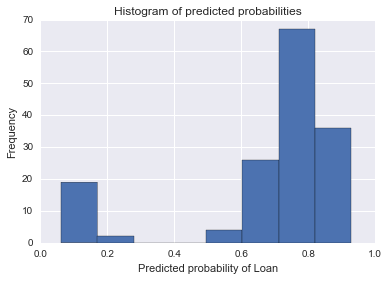

In [45]:
# histogram of predicted probabilities
plt.hist(Y_pred_prob, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of Loan')
plt.ylabel('Frequency')

In [46]:
# predict diabetes if the predicted probability is greater than 0.3
from sklearn.preprocessing import binarize
Y_pred_class = binarize([Y_pred_prob], 0.7)[0]

In [47]:
# print the first 10 predicted probabilities
Y_pred_prob[0:10]

array([ 0.85258274,  0.81935108,  0.7142994 ,  0.80883901,  0.89461989,
        0.0613621 ,  0.7934656 ,  0.7297876 ,  0.08095015,  0.85787879])

In [48]:

# print the first 10 predicted classes with the lower threshold
Y_pred_class[0:10]

array([ 1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  0.,  1.])

In [49]:
# previous confusion matrix (default threshold of 0.5)
print(confusion)

[[ 19  24]
 [  2 109]]


In [50]:

# new confusion matrix (threshold of 0.3)
print(metrics.confusion_matrix(Y_test, Y_pred_class))

[[27 16]
 [21 90]]
